In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed to make results reproducible
np.random.seed(0)

# Set the figure.figsize to (12,6)
plt.rcParams['figure.figsize'] = (12,6)

# Interaction terms

The effect of a specific variable on the dependent variable does not always only depend on that specific variable alone.

Let's take the example of annual salary. It is reasonable to believe that the annual salary of a person depends on the **years of working experience**. Additionally, the annual salary could for example depend on the person having a university degree. Maybe the salary also increases at a different rate for people with or without university degree. In this case we need an interaction between years of work experience and university degree term to include this relationship in the linear regression.

In [32]:
w_0 = 20_000 # starting salary of a person without university degree with no working experience
w_1 = 1_000 # the average salary increase per year for a person without a university degree
w_2 = 5_000 # difference in starting salary for a person with university degree and a person without university degree
w_3 = 1_000 # difference in the salary increase per year between a person with university degree and a person without

In [33]:
def annual_salary(work_experience, university_degree, sample_size):
    '''
    Calculate the annual sallaries of people given their years of work experience and whether they have a university degree
    or not.
    
    Paramaters
    ----------
    work_experience : int
        Years of work experience
    university_degree : int [0,1]
        Indicates whether a person has a university degree or not
    sample_size : int
        Number of people in the sample
        
    Returns
    -------
    array
    '''
    return w_0 + w_1*work_experience + w_2*university_degree + w_3*work_experience*university_degree + np.random.randn(sample_size) * 10000

In [34]:
np.random.randint(low=0, high=2, size=2)

array([0, 1])

In [35]:
# Choose sample size
sample_size = 50

# Create an array of 0s and 1s of length sample_size; indicates whether a person has a university degree or not
university_degree = np.random.randint(2, size=sample_size)

# Create an array of values between 0 and 29; indicates the years of working experience
work_experience = np.random.randint(30, size=sample_size)

In [36]:
# Calculate the salaries
salaries = annual_salary(work_experience, university_degree, sample_size)

In [37]:
# Inspect the salaries
salaries

array([64561.07030158, 31729.79913805, 23488.8088836 , 58911.43477937,
       36047.76070726, 27799.74072157, -4437.82683845,  5436.61449727,
       53077.42450066, 63112.85319834, 44004.40083739, 32450.0831563 ,
       70442.09309417, 40856.14390168, 35991.61234731, 51556.45342156,
       68110.38216822, 79200.77554608, 24597.34653243,  6186.51357165,
       12832.05194769, 45807.75899614, 28537.22719998, 35566.44562768,
       41100.3776713 , 35417.77413129, 43809.0565129 , 35258.57988475,
       43475.32403129, 32398.46787435, 72765.20474265, 40894.22289676,
       25056.72629248, 47943.03206208, 56427.95712888, 26450.18473403,
       23617.17285194,  2750.79730884, 20699.81166958, 27825.4813538 ,
       45581.99988231, 35235.1978684 , 83815.13275381, 49592.7664068 ,
       75001.39611962, 48058.38362785, 32045.20923343, 41639.56849422,
       65194.35033869, 48028.56438693])

In [38]:
# Convert everything into a pd.DataFrame
df = pd.DataFrame([salaries, work_experience, university_degree], 
                  index=['salaries', 'work_experience', 'university_degree']).transpose()
df.head()

,salaries,work_experience,university_degree
0,64561.070302,11.0,1.0
1,31729.799138,2.0,0.0
2,23488.808884,19.0,0.0
3,58911.434779,16.0,1.0
4,36047.760707,0.0,0.0


<AxesSubplot:xlabel='work_experience', ylabel='salaries'>

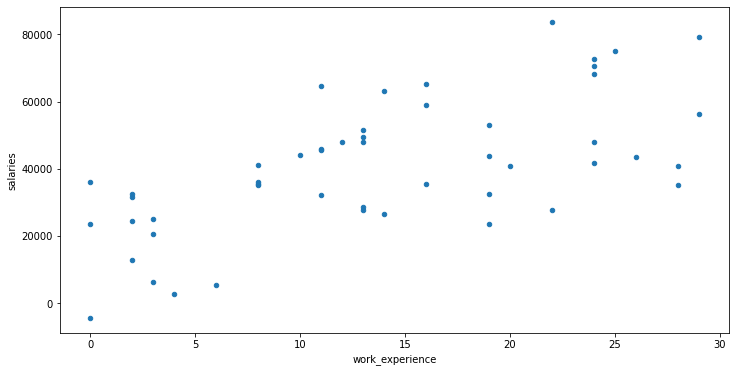

In [39]:
# Plot the values
df.sort_values('work_experience').plot(x='work_experience', y='salaries', kind='scatter')

In [40]:
# Create interaction terms and run a model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [49]:
# Create the model
m = LinearRegression()

# Create an interaction term between work_experience and university_degree
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df[['work_experience', 'university_degree']])

In [51]:
poly_features

array([[11.,  1., 11.],
       [ 2.,  0.,  0.],
       [19.,  0.,  0.],
       [16.,  1., 16.],
       [ 0.,  0.,  0.],
       [22.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 6.,  0.,  0.],
       [19.,  1., 19.],
       [14.,  1., 14.],
       [10.,  0.,  0.],
       [19.,  0.,  0.],
       [24.,  1., 24.],
       [28.,  0.,  0.],
       [ 8.,  1.,  8.],
       [13.,  1., 13.],
       [24.,  1., 24.],
       [29.,  1., 29.],
       [ 2.,  0.,  0.],
       [ 3.,  0.,  0.],
       [ 2.,  0.,  0.],
       [11.,  1., 11.],
       [13.,  0.,  0.],
       [16.,  1., 16.],
       [ 8.,  1.,  8.],
       [ 8.,  1.,  8.],
       [19.,  0.,  0.],
       [ 8.,  1.,  8.],
       [26.,  0.,  0.],
       [ 2.,  0.,  0.],
       [24.,  1., 24.],
       [20.,  0.,  0.],
       [ 3.,  1.,  3.],
       [12.,  1., 12.],
       [29.,  0.,  0.],
       [14.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 4.,  0.,  0.],
       [ 3.,  1.,  3.],
       [13.,  0.,  0.],
       [11.,  1., 11.],
       [28.,  0.

In [43]:
# Fit the model
m.fit(poly_features, df['salaries'])
ypred_exp = m.predict(poly_features)

In [44]:
X = pd.DataFrame(poly_features, columns=['work_experience', 'university_degree', 'work_experience*university_degree'])
X.head()

,work_experience,university_degree,work_experience*university_degree
0,11.0,1.0,11.0
1,2.0,0.0,0.0
2,19.0,0.0,0.0
3,16.0,1.0,16.0
4,0.0,0.0,0.0


In [45]:
# Visualize the result
def plot_results(ypred, y_true, x):
    plt.figure(figsize=(12, 8))
    plt.scatter(x, y_true, color='b')
    plt.scatter(x, ypred, color='r')
    plt.show()

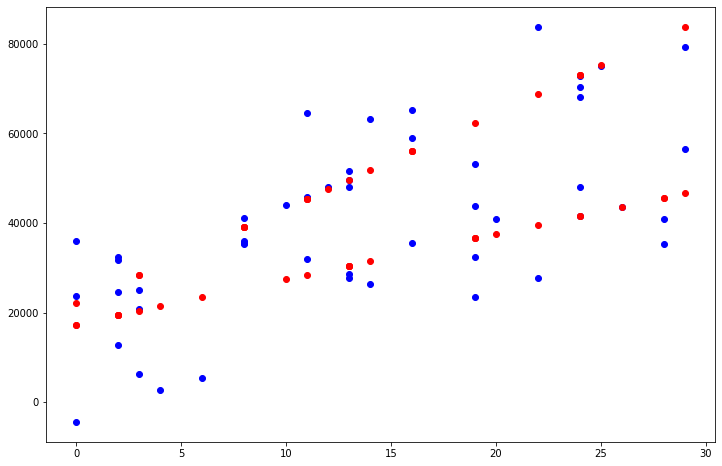

In [46]:
plot_results(ypred_exp, df['salaries'], df[['work_experience']])

Possible interactions in the bicycle dataset?

- Humidity + temperature
- workingday + hour

In [55]:
# What happes if we do not specify interaction_only in the PolynomialFeatures
poly_transformer = PolynomialFeatures(include_bias=False)
pd.DataFrame(poly_transformer.fit_transform(df[['work_experience', 'university_degree']]),
                                            columns=['work_experience', 'university_degree', 'work_experience_squared',
                                                    'interaction', 'university_degree_squared']
                                           )

,work_experience,university_degree,work_experience_squared,interaction,university_degree_squared
0,11.0,1.0,121.0,11.0,1.0
1,2.0,0.0,4.0,0.0,0.0
2,19.0,0.0,361.0,0.0,0.0
3,16.0,1.0,256.0,16.0,1.0
4,0.0,0.0,0.0,0.0,0.0
5,22.0,0.0,484.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,6.0,0.0,36.0,0.0,0.0
8,19.0,1.0,361.0,19.0,1.0
9,14.0,1.0,196.0,14.0,1.0


In [56]:
poly_transformer.get_feature_names()

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']